# COVID-19 Literature Clustering

@inproceedings{COVID-19 Literature Clustering,
    author = {Eren, E. Maksim. Solovyev, Nick. Nicholas, Charles. Raff, Edward},
    title = {COVID-19 Literature Clustering},
    year = {2020},
    month = {April},
    location = {University of Maryland Baltimore County (UMBC), Baltimore, MD, USA},
    note={Malware Research Group},
    url = {\url{https://github.com/MaksimEkin/COVID19-Literature-Clustering}},
    howpublished = {TBA}
}

<div class="alert alert-warning" >
    
_Note:_ conda install -c conda-forge langdetect; conda install -c conda-forge spacy; conda install -c conda-forge spacy-model-en_core_web_lg

</div>

# Data
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/?select=metadata.csv

In [1]:
import numpy as np 
import pandas as pd
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
pwd

'/Users/admin/Desktop/python/covid19/covid19_nlp'

In [3]:
root_path = '/Users/admin/Desktop/python/covid19/covid19_nlp'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

In [4]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128492 entries, 0 to 128491
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          128492 non-null  object 
 1   sha               55751 non-null   object 
 2   source_x          128492 non-null  object 
 3   title             128464 non-null  object 
 4   doi               100586 non-null  object 
 5   pmcid             60771 non-null   object 
 6   pubmed_id         99124 non-null   object 
 7   license           128492 non-null  object 
 8   abstract          101611 non-null  object 
 9   publish_time      128477 non-null  object 
 10  authors           123725 non-null  object 
 11  journal           122195 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  17071 non-null   object 
 14  arxiv_id          1395 non-null    object 
 15  pdf_json_files    55751 non-null   object 
 16  pmc_json_files    43

# Fetch All of JSON File Path¶

In [5]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

103314

Helper Functions

In [ ]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

In [7]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

# Load the Data into DataFrame¶

In [51]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 103314
Processing index: 10331 of 103314
Processing index: 20662 of 103314
Processing index: 30993 of 103314
Processing index: 41324 of 103314
Processing index: 51655 of 103314
Processing index: 61986 of 103314
Processing index: 72317 of 103314
Processing index: 82648 of 103314
Processing index: 92979 of 103314
Processing index: 103310 of 103314


paper_id                            doi  \
0  4fcb95cc0c4ea6d1fa4137a4a087715ed6b68cea     10.1007/s00431-019-03543-0   
1  86d4262de73cf81b5ea6aafb91630853248bff5f   10.1016/j.bbamcr.2011.06.011   
2  b2f67d533f2749807f2537f3775b39da3b186051    10.1016/j.fsiml.2020.100013   
3  9ec0b1175992879d5b8d3351ef40a28bb48f18ce     10.1016/j.jhin.2019.07.001   
4  4ed70c27f14b7f9e6219fe605eae2b21a229f23c  10.1080/14787210.2017.1271712   

                                            abstract  \
0  Abnormal levels of end-tidal carbon dioxide (E...   
1  The endoplasmic reticulum (ER) is the biggest ...   
2                                                      
3                                                      
4                                                      

                                           body_text  \
0  Improvements in neonatal intensive care have r...   
1  The endoplasmic reticulum (ER) is a multi-func...   
2  There is a disproportionate number of individu...   
3  Sir, Testing for respiratory virus infections ...   
4  The Middle East respiratory syndrome coronavir...   

                                             authors  \
0   Tamura, Kentaro.  Williams, Emma E.  Dassios,...   
1                   Lynes, Emily M..  Simmen, Thomas   
2   Liebrenz, Michael.  Bhugra, Dinesh.  Buadze,<...   
3   Gohil, S..  Donaghy, B..  Tature, D..  Kowal,...   
4             Al-Tawfiq, Jaffar A..  Memish, Ziad A.   

                                               title  \
0   End-tidal carbon dioxide levels during<br>res...   
1   Urban planning of the endoplasmic reticulum<b...   
2   Caring for persons in detention suffering wit...   
3   Seasonal respiratory virus testing in<br>mana...   
4   Update on therapeutic options for Middle East...   

                                             journal  \
0                                      Eur J Pediatr   
1  Biochimica et Biophysica Acta (BBA) - Molecula...   
2       Forensic Science International: Mind and Law   
3                                      J Hosp Infect   
4                        Expert Rev Anti Infect Ther   

                                    abstract_summary  
0   Abnormal levels of end-tidal carbon dioxide<b...  
1   The endoplasmic reticulum (ER) is the biggest...  
2                                      Not provided.  
3                                      Not provided.  
4                                      Not provided.

# Some feature engineering

In [52]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_covid['body_unique_words']=df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df_covid.head()

paper_id                            doi  \
0  4fcb95cc0c4ea6d1fa4137a4a087715ed6b68cea     10.1007/s00431-019-03543-0   
1  86d4262de73cf81b5ea6aafb91630853248bff5f   10.1016/j.bbamcr.2011.06.011   
2  b2f67d533f2749807f2537f3775b39da3b186051    10.1016/j.fsiml.2020.100013   
3  9ec0b1175992879d5b8d3351ef40a28bb48f18ce     10.1016/j.jhin.2019.07.001   
4  4ed70c27f14b7f9e6219fe605eae2b21a229f23c  10.1080/14787210.2017.1271712   

                                            abstract  \
0  Abnormal levels of end-tidal carbon dioxide (E...   
1  The endoplasmic reticulum (ER) is the biggest ...   
2                                                      
3                                                      
4                                                      

                                           body_text  \
0  Improvements in neonatal intensive care have r...   
1  The endoplasmic reticulum (ER) is a multi-func...   
2  There is a disproportionate number of individu...   
3  Sir, Testing for respiratory virus infections ...   
4  The Middle East respiratory syndrome coronavir...   

                                             authors  \
0   Tamura, Kentaro.  Williams, Emma E.  Dassios,...   
1                   Lynes, Emily M..  Simmen, Thomas   
2   Liebrenz, Michael.  Bhugra, Dinesh.  Buadze,<...   
3   Gohil, S..  Donaghy, B..  Tature, D..  Kowal,...   
4             Al-Tawfiq, Jaffar A..  Memish, Ziad A.   

                                               title  \
0   End-tidal carbon dioxide levels during<br>res...   
1   Urban planning of the endoplasmic reticulum<b...   
2   Caring for persons in detention suffering wit...   
3   Seasonal respiratory virus testing in<br>mana...   
4   Update on therapeutic options for Middle East...   

                                             journal  \
0                                      Eur J Pediatr   
1  Biochimica et Biophysica Acta (BBA) - Molecula...   
2       Forensic Science International: Mind and Law   
3                                      J Hosp Infect   
4                        Expert Rev Anti Infect Ther   

                                    abstract_summary  abstract_word_count  \
0   Abnormal levels of end-tidal carbon dioxide<b...                  218   
1   The endoplasmic reticulum (ER) is the biggest...                  234   
2                                      Not provided.                    0   
3                                      Not provided.                    0   
4                                      Not provided.                    0   

   body_word_count  body_unique_words  
0             2601                830  
1             8069               2282  
2             1126                540  
3              815                385  
4             2748                996

In [53]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52471 entries, 0 to 52470
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             52471 non-null  object
 1   doi                  50995 non-null  object
 2   abstract             52471 non-null  object
 3   body_text            52471 non-null  object
 4   authors              51301 non-null  object
 5   title                52471 non-null  object
 6   journal              48182 non-null  object
 7   abstract_summary     52471 non-null  object
 8   abstract_word_count  52471 non-null  int64 
 9   body_word_count      52471 non-null  int64 
 10  body_unique_words    52471 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 4.4+ MB


# Handle Possible Duplicates

In [54]:
df_covid['abstract'].describe(include='all')

count     52471
unique    37150
top            
freq      15128
Name: abstract, dtype: object

In [55]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     52339
unique    37150
top            
freq      15034
Name: abstract, dtype: object

In [56]:
df_covid['body_text'].describe(include='all')

count                              52339
unique                             52334
top       J o u r n a l P r e -p r o o f
freq                                   3
Name: body_text, dtype: object

# Take a Look at the Data

In [57]:
df_covid.head()

paper_id                            doi  \
0  4fcb95cc0c4ea6d1fa4137a4a087715ed6b68cea     10.1007/s00431-019-03543-0   
1  86d4262de73cf81b5ea6aafb91630853248bff5f   10.1016/j.bbamcr.2011.06.011   
2  b2f67d533f2749807f2537f3775b39da3b186051    10.1016/j.fsiml.2020.100013   
3  9ec0b1175992879d5b8d3351ef40a28bb48f18ce     10.1016/j.jhin.2019.07.001   
4  4ed70c27f14b7f9e6219fe605eae2b21a229f23c  10.1080/14787210.2017.1271712   

                                            abstract  \
0  Abnormal levels of end-tidal carbon dioxide (E...   
1  The endoplasmic reticulum (ER) is the biggest ...   
2                                                      
3                                                      
4                                                      

                                           body_text  \
0  Improvements in neonatal intensive care have r...   
1  The endoplasmic reticulum (ER) is a multi-func...   
2  There is a disproportionate number of individu...   
3  Sir, Testing for respiratory virus infections ...   
4  The Middle East respiratory syndrome coronavir...   

                                             authors  \
0   Tamura, Kentaro.  Williams, Emma E.  Dassios,...   
1                   Lynes, Emily M..  Simmen, Thomas   
2   Liebrenz, Michael.  Bhugra, Dinesh.  Buadze,<...   
3   Gohil, S..  Donaghy, B..  Tature, D..  Kowal,...   
4             Al-Tawfiq, Jaffar A..  Memish, Ziad A.   

                                               title  \
0   End-tidal carbon dioxide levels during<br>res...   
1   Urban planning of the endoplasmic reticulum<b...   
2   Caring for persons in detention suffering wit...   
3   Seasonal respiratory virus testing in<br>mana...   
4   Update on therapeutic options for Middle East...   

                                             journal  \
0                                      Eur J Pediatr   
1  Biochimica et Biophysica Acta (BBA) - Molecula...   
2       Forensic Science International: Mind and Law   
3                                      J Hosp Infect   
4                        Expert Rev Anti Infect Ther   

                                    abstract_summary  abstract_word_count  \
0   Abnormal levels of end-tidal carbon dioxide<b...                  218   
1   The endoplasmic reticulum (ER) is the biggest...                  234   
2                                      Not provided.                    0   
3                                      Not provided.                    0   
4                                      Not provided.                    0   

   body_word_count  body_unique_words  
0             2601                830  
1             8069               2282  
2             1126                540  
3              815                385  
4             2748                996

In [58]:
df_covid.describe()

abstract_word_count  body_word_count  body_unique_words
count         52339.000000     52339.000000       52339.000000
mean            157.998223      4769.102199        1409.134756
std             186.518579      9996.566795        1640.970446
min               0.000000         1.000000           1.000000
25%               0.000000      2008.000000         802.000000
50%             151.000000      3359.000000        1164.000000
75%             234.000000      5130.000000        1606.000000
max            7415.000000    279623.000000       38298.000000

# Data Pre-processing

In [59]:
df = df_covid.sample(10000, random_state=42)
#del df_covid

In [60]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 39318 to 3570
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             8908 non-null   object
 1   doi                  8908 non-null   object
 2   abstract             8908 non-null   object
 3   body_text            8908 non-null   object
 4   authors              8908 non-null   object
 5   title                8908 non-null   object
 6   journal              8908 non-null   object
 7   abstract_summary     8908 non-null   object
 8   abstract_word_count  8908 non-null   int64 
 9   body_word_count      8908 non-null   int64 
 10  body_unique_words    8908 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 835.1+ KB


In [61]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 39318 to 3570
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             8908 non-null   object
 1   doi                  8908 non-null   object
 2   abstract             8908 non-null   object
 3   body_text            8908 non-null   object
 4   authors              8908 non-null   object
 5   title                8908 non-null   object
 6   journal              8908 non-null   object
 7   abstract_summary     8908 non-null   object
 8   abstract_word_count  8908 non-null   int64 
 9   body_word_count      8908 non-null   int64 
 10  body_unique_words    8908 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 835.1+ KB


# Handling multiple languages

In [62]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 8908/8908 [01:02<00:00, 142.79it/s]


In [63]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 8908

{'cy': 1,
 'de': 132,
 'en': 8601,
 'es': 64,
 'fr': 90,
 'it': 5,
 'nl': 13,
 'pt': 1,
 'ro': 1}


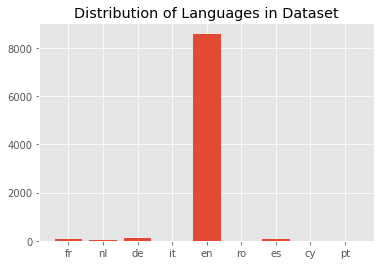

In [64]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [65]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8601 entries, 39318 to 3570
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             8601 non-null   object
 1   doi                  8601 non-null   object
 2   abstract             8601 non-null   object
 3   body_text            8601 non-null   object
 4   authors              8601 non-null   object
 5   title                8601 non-null   object
 6   journal              8601 non-null   object
 7   abstract_summary     8601 non-null   object
 8   abstract_word_count  8601 non-null   int64 
 9   body_word_count      8601 non-null   int64 
 10  body_unique_words    8601 non-null   int64 
 11  language             8601 non-null   object
dtypes: int64(3), object(9)
memory usage: 873.5+ KB


In [66]:
# Download the spacy bio parser

from IPython.utils import io
with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [69]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_lg  # model downloaded in previous step

# Stopwords

In [70]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['all',
 'own',
 'already',
 'towards',
 'then',
 'whoever',
 'say',
 'which',
 'into',
 'take']

In [71]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

# A function that will process the text data

In [72]:
# Parser
parser = en_core_web_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

# Applying the text-processing function on the body_text

In [73]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 8601/8601 [54:59<00:00,  2.61it/s]  


# Word count in the papers

In [74]:
import seaborn as sns

count      8601.000000
mean       4210.114754
std        4191.947514
min           4.000000
25%        2069.000000
50%        3434.000000
75%        5180.000000
max      124703.000000
Name: body_word_count, dtype: float64

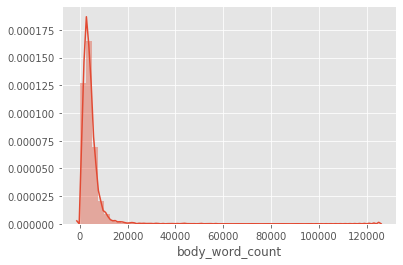

In [75]:
sns.distplot(df['body_word_count'])
df['body_word_count'].describe()

count     8601.000000
mean      1326.235438
std        897.425493
min          4.000000
25%        826.000000
50%       1191.000000
75%       1617.000000
max      20966.000000
Name: body_unique_words, dtype: float64

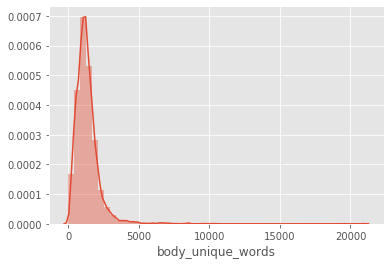

In [76]:
sns.distplot(df['body_unique_words'])
df['body_unique_words'].describe()

# Vectorization

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [78]:
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(8601, 4096)

# PCA & Clustering

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(8601, 2178)

In [80]:
from sklearn.cluster import KMeans

# How many clusters?

In [85]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(15, 25)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

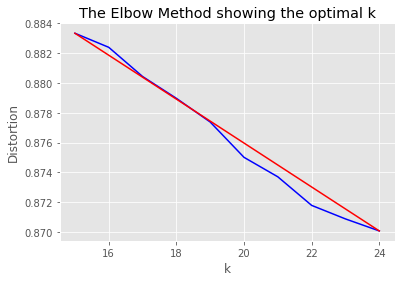

In [86]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Run k-means

In [87]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

# Dimensionality Reduction with t-SNE

In [88]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 8601 samples in 6.389s...
[t-SNE] Computed neighbors for 8601 samples in 542.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8601
[t-SNE] Computed conditional probabilities for sample 2000 / 8601
[t-SNE] Computed conditional probabilities for sample 3000 / 8601
[t-SNE] Computed conditional probabilities for sample 4000 / 8601
[t-SNE] Computed conditional probabilities for sample 5000 / 8601
[t-SNE] Computed conditional probabilities for sample 6000 / 8601
[t-SNE] Computed conditional probabilities for sample 7000 / 8601
[t-SNE] Computed conditional probabilities for sample 8000 / 8601
[t-SNE] Computed conditional probabilities for sample 8601 / 8601
[t-SNE] Mean sigma: 0.367739
[t-SNE] KL divergence after 50 iterations with early exaggeration: 80.517990
[t-SNE] KL divergence after 1000 iterations: 1.871137


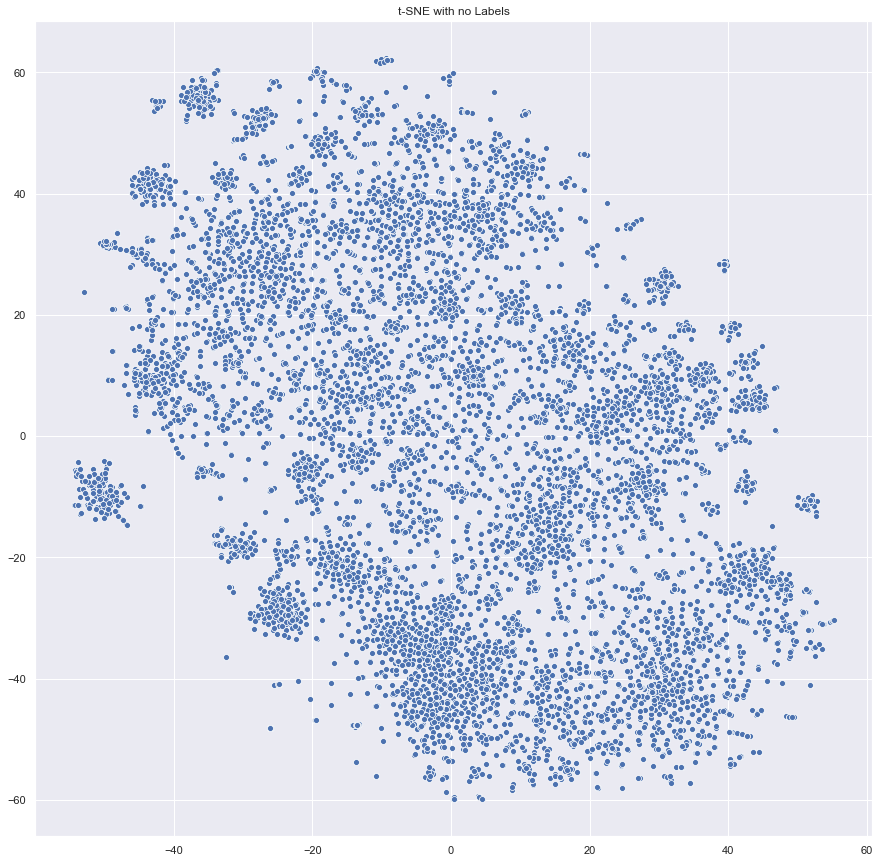

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

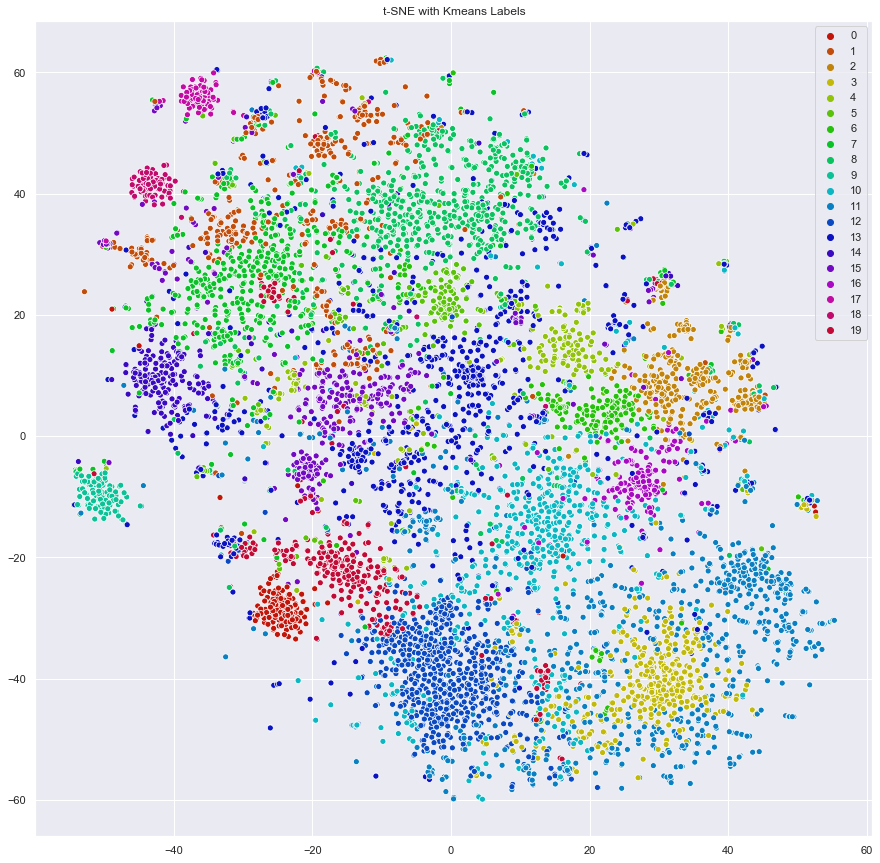

In [91]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

# Topic Modeling on Each Cluster

In [92]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True,
                                       token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [94]:
vectorizers[0]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [95]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [96]:
len(vectorized_data)

20

In [97]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 20

lda_models = []
for ii in range(0, 20):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [98]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [99]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [100]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [104]:
all_keywords[0][:10]

['mouse',
 'test',
 'camel',
 'vaccine',
 'pro',
 'sars',
 'residue',
 'package',
 'signal',
 'therapy']

In [102]:
len(all_keywords)

20

# Save current outputs to file

In [105]:
f=open('topics.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

In [106]:
import pickle

# save the COVID-19 DataFrame, too large for github
pickle.dump(df, open("df_covid.p", "wb" ))

# save the final t-SNE
pickle.dump(X_embedded, open("X_embedded.p", "wb" ))

# save the labels generate with k-means(20)
pickle.dump(y_pred, open("y_pred.p", "wb" ))

# Classify

In [107]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

# Split the data into train/test sets

In [108]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 6880
X_test size: 1721 



In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=4)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  88.038 %
     Precision:  89.648 %
        Recall:  88.208 %
      F1 score:  88.851 %


# Test for overfitting

In [110]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=4)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  83.614 %
     Precision:  86.200 %
        Recall:  85.327 %
      F1 score:  85.504 %


In [111]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 89.629 %


# Plotting the data

In [ ]:
import os

# change into lib directory to load plot python scripts
main_path = os.getcwd()
lib_path = '/kaggle/input/kaggle-resources'
os.chdir(lib_path)

In [120]:
from bokeh.models import CustomJS

# handle the currently selected article
def selected_code():
    code = """
            var titles = [];
            var authors = [];
            var journals = [];
            var links = [];
            cb_data.source.selected.indices.forEach(index => titles.push(source.data['titles'][index]));
            cb_data.source.selected.indices.forEach(index => authors.push(source.data['authors'][index]));
            cb_data.source.selected.indices.forEach(index => journals.push(source.data['journal'][index]));
            cb_data.source.selected.indices.forEach(index => links.push(source.data['links'][index]));
            title = "<h4>" + titles[0].toString().replace(/<br>/g, ' ') + "</h4>";
            authors = "<p1><b>Authors:</b> " + authors[0].toString().replace(/<br>/g, ' ') + "<br>"
            // journal = "<b>Journal</b>" + journals[0].toString() + "<br>"
            link = "<b>Link:</b> <a href='" + "http://doi.org/" + links[0].toString() + "'>" + "http://doi.org/" + links[0].toString() + "</a></p1>"
            current_selection.text = title + authors + link
            current_selection.change.emit();
    """
    return code

# handle the keywords and search
def input_callback(plot, source, out_text, topics): 

    # slider call back for cluster selection
    callback = CustomJS(args=dict(p=plot, source=source, out_text=out_text, topics=topics), code="""
				var key = text.value;
				key = key.toLowerCase();
				var cluster = slider.value;
                var data = source.data; 
                
                
                x = data['x'];
                y = data['y'];
                x_backup = data['x_backup'];
                y_backup = data['y_backup'];
                labels = data['desc'];
                abstract = data['abstract'];
                titles = data['titles'];
                authors = data['authors'];
                journal = data['journal'];
                if (cluster == '20') {
                    out_text.text = 'Keywords: Slide to specific cluster to see the keywords.';
                    for (i = 0; i < x.length; i++) {
						if(abstract[i].includes(key) || 
						titles[i].includes(key) || 
						authors[i].includes(key) || 
						journal[i].includes(key)) {
							x[i] = x_backup[i];
							y[i] = y_backup[i];
						} else {
							x[i] = undefined;
							y[i] = undefined;
						}
                    }
                }
                else {
                    out_text.text = 'Keywords: ' + topics[Number(cluster)];
                    for (i = 0; i < x.length; i++) {
                        if(labels[i] == cluster) {
							if(abstract[i].includes(key) || 
							titles[i].includes(key) || 
							authors[i].includes(key) || 
							journal[i].includes(key)) {
								x[i] = x_backup[i];
								y[i] = y_backup[i];
							} else {
								x[i] = undefined;
								y[i] = undefined;
							}
                        } else {
                            x[i] = undefined;
                            y[i] = undefined;
                        }
                    }
                }
            source.change.emit();
            """)
    return callback

In [122]:
# required libraries for plot
#from call_backs import input_callback, selected_code  # file with customJS callbacks for bokeh
                                                      # github.com/MaksimEkin/COVID19-Literature-Clustering/blob/master/lib/call_backs.py
import bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS, Slider, TapTool, TextInput
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap, transform
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import RadioButtonGroup, TextInput, Div, Paragraph
from bokeh.layouts import column, widgetbox, row, layout
from bokeh.layouts import column

In [115]:
# go back
#os.chdir(main_path)

# Load the Keywords per Cluster

In [117]:
import os

topic_path = 'topics.txt'
with open(topic_path) as f:
    topics = f.readlines()

# Setup

In [118]:
# show on notebook
output_notebook()
# target labels
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= X_embedded[:,0], 
    y= X_embedded[:,1],
    x_backup = X_embedded[:,0],
    y_backup = X_embedded[:,1],
    desc= y_labels, 
    titles= df['title'],
    authors = df['authors'],
    journal = df['journal'],
    abstract = df['abstract_summary'],
    labels = ["C-" + str(x) for x in y_labels],
    links = df['doi']
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles{safe}"),
    ("Author(s)", "@authors{safe}"),
    ("Journal", "@journal"),
    ("Abstract", "@abstract{safe}"),
    ("Link", "@links")
],
point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
plot = figure(plot_width=1200, plot_height=850, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset', 'save', 'tap'], 
           title="Clustering of the COVID-19 Literature with t-SNE and K-Means", 
           toolbar_location="above")

# plot settings
plot.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')
plot.legend.background_fill_alpha = 0.6

Loading BokehJS ...

# Widgets

In [123]:
# Keywords
text_banner = Paragraph(text= 'Keywords: Slide to specific cluster to see the keywords.', height=45)
input_callback_1 = input_callback(plot, source, text_banner, topics)

# currently selected article
div_curr = Div(text="""Click on a plot to see the link to the article.""",height=150)
callback_selected = CustomJS(args=dict(source=source, current_selection=div_curr), code=selected_code())
taptool = plot.select(type=TapTool)
taptool.callback = callback_selected

# WIDGETS
slider = Slider(start=0, end=20, value=20, step=1, title="Cluster #", callback=input_callback_1)
keyword = TextInput(title="Search:", callback=input_callback_1)

# pass call back arguments
input_callback_1.args["text"] = keyword
input_callback_1.args["slider"] = slider

# Style

In [124]:
# STYLE
slider.sizing_mode = "stretch_width"
slider.margin=15

keyword.sizing_mode = "scale_both"
keyword.margin=15

div_curr.style={'color': '#BF0A30', 'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
div_curr.sizing_mode = "scale_both"
div_curr.margin = 20

text_banner.style={'color': '#0269A4', 'font-family': 'Helvetica Neue, Helvetica, Arial, sans-serif;', 'font-size': '1.1em'}
text_banner.sizing_mode = "scale_both"
text_banner.margin = 20

plot.sizing_mode = "scale_both"
plot.margin = 5

r = row(div_curr,text_banner)
r.sizing_mode = "stretch_width"

# SHOW

In [125]:
# LAYOUT OF THE PAGE
l = layout([
    [slider, keyword],
    [text_banner],
    [div_curr],
    [plot],
])
l.sizing_mode = "scale_both"

# show
output_file('t-sne_covid-19_interactive.html')
show(l)